In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [3]:
df.shape

(150, 6)

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

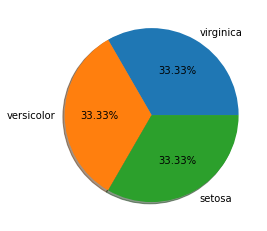

In [9]:
labels = 'virginica', 'versicolor', 'setosa'

fig, ax = plt.subplots()
ax.pie(df['Species'].value_counts(), labels = labels, autopct = '%1.2f%%', shadow = True)
plt.show()

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='Species', ylabel='count'>

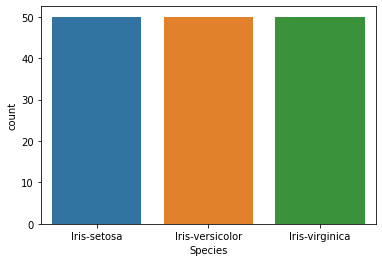

In [11]:
sns.countplot(df['Species'])

In [12]:
X = df.drop('Species', axis = 1)
y = df['Species']

##### In case of oversampling

1. from imblearn.over_sampling import SMOTE
2. SM = SMOTE()
3. X, y = SM.fit_resample(X, y)

#### In case of undersampling

1. from imblearn.under_sampling import NearMiss
2. NR = NearMiss()
3. X, y = NR.fit_resample(X, y)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

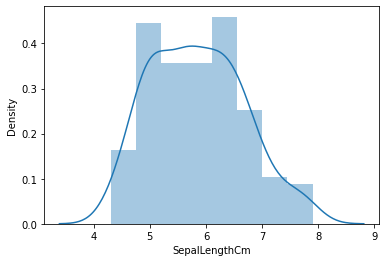

In [14]:
sns.distplot(df['SepalLengthCm'])

###### Identify outlier by boxplot

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Species'] = LE.fit_transform(df['Species'])

In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


###### Plotting heatmap

##### Outlier removal

In [17]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z < 3).all(axis = 1)]

In [18]:
new_df.shape

(149, 6)

#### SKewness

In [19]:
new_df.skew()

Id              -0.010283
SepalLengthCm    0.310490
SepalWidthCm     0.209284
PetalLengthCm   -0.289895
PetalWidthCm    -0.119333
Species         -0.012434
dtype: float64

### Finding best random state

### Saving the model

In [20]:
import joblib
joblib.dump(Final_model, 'Finalmodel.pkl')

NameError: name 'Final_model' is not defined

### loading the model

In [21]:
mod = joblib.load('Finalmodel.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'Finalmodel.pkl'

In [22]:
print(mod.predict(x_test))

NameError: name 'mod' is not defined